In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import time
from joblib import Parallel,delayed
%matplotlib notebook
sn.set_style("ticks",sn.axes_style({'axes.grid': True}))

def distance(a,b):
    d = np.sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 + (b[2]-a[2])**2 )
    return d

In [2]:
#random = np.loadtxt('/home/bellis/sdss_data/10k_weighted_random.dat')
#data = np.loadtxt('/home/bellis/sdss_data/10k_weighted_north_cmass.dat')

#random = np.loadtxt('/home/bellis/sdss_data/100k_weighted_random.dat')
#data = np.loadtxt('/home/bellis/sdss_data/100k_weighted_north_cmass.dat')

random = np.loadtxt('1mil_weighted_random.dat.dat')
data = np.loadtxt('500k_weighted_north_cmass.dat')

dt=data.transpose()
rt=random.transpose()



In [ ]:
#plt.figure()
#ax=plt.axes(projection="3d")
#ax.scatter(dt[0],dt[1],dt[3],s=2)

#plt.figure(figsize=(11,4))
#plt.subplot(1,2,1)
#plt.scatter(dt[0],dt[1],s=2,marker='H',alpha=0.1)

#plt.subplot(1,2,2)
#plt.scatter(rt[0],rt[1],s=2,marker='H',alpha=0.1)


#plt.figure(figsize=(11,4))
#plt.subplot(1,2,1)
#plt.scatter(dt[0],dt[2],s=2,marker='H',alpha=0.1)

#plt.subplot(1,2,2)
#plt.scatter(rt[0],rt[2],s=2,marker='H',alpha=0.1)


#plt.figure(figsize=(11,4))
#plt.subplot(1,2,1)
#plt.hist(dt[2],bins=100,range=(0.40,0.75));

#plt.subplot(1,2,2)
#plt.hist(rt[2],bins=100,range=(0.40,0.75));




#plt.figure()
#plt.scatter(rt[0],rt[1],s=2,marker='H',alpha=0.1)



#plt.figure()
#zhist = plt.hist(dt[2],bins=75)

#plt.figure()
#cdhist =  plt.hist(dt[3],bins=75)'''
#print(data[3])
#print(random[3])

In [ ]:
# z=v/c , v=h_0*d , z*c = h_0*d -> d=(z*c)/h_0
# ra = theta
# dec = phi

def spherical_to_cartesian(ar,alt_cmd=None):
    
    newpts=[]
    
    if alt_cmd is None:
        
        for i in range(len(ar[0])):
            
            ra = np.deg2rad(ar[0,i])
            dec = np.deg2rad(ar[1,i])
            cmd=ar[3,i]

            ############################

            x=cmd*np.cos(ra)*np.cos(dec)
            y=cmd*np.sin(ra)*np.cos(dec)
            z=cmd*np.sin(dec)

            ############################


            xyz=[x,y,z]

            newpts.append(xyz)
        
    else:
        
        for i in range(len(ar[0])):
            
            ra = np.deg2rad(ar[0,i])
            dec = np.deg2rad(ar[1,i])
            cmd=alt_cmd[i]

            ############################

            x=cmd*np.cos(ra)*np.cos(dec)
            y=cmd*np.sin(ra)*np.cos(dec)
            z=cmd*np.sin(dec)

            ############################


            xyz=[x,y,z]

            newpts.append(xyz)
        
    return np.array(newpts).transpose()

In [ ]:
import astropy
#from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cd = cosmo.comoving_distance(dt[2])
cdist = cd.value * 0.7

rcd = cosmo.comoving_distance(rt[2])
rcdist = rcd.value * 0.7

In [ ]:
'''print(rcdist[0:10])
print(rt[3][0:10])'''

In [ ]:
d_conv=spherical_to_cartesian(dt,alt_cmd=cdist)

r_conv=spherical_to_cartesian(rt,alt_cmd=rcdist)

#plt.figure()
#ax=plt.axes(projection="3d")
#ax.scatter(d_conv[0],d_conv[1],d_conv[2],s=2,alpha=0.05)

#np.savetxt('200k_pts_xyz_data',d_conv)

In [ ]:
'''plt.figure(figsize=(11,4))
plt.subplot(1,3,1)
plt.plot(d_conv[0],d_conv[1],'.',alpha=0.1)

plt.subplot(1,3,2)
plt.plot(d_conv[0],d_conv[2],'.',alpha=0.1)

plt.subplot(1,3,3)
plt.plot(d_conv[1],d_conv[2],'.',alpha=0.1)


plt.figure(figsize=(11,4))
plt.subplot(1,3,1)
plt.plot(r_conv[0],r_conv[1],'.',alpha=0.1)

plt.subplot(1,3,2)
plt.plot(r_conv[0],r_conv[2],'.',alpha=0.1)

plt.subplot(1,3,3)
plt.plot(r_conv[1],r_conv[2],'.',alpha=0.1)'''

In [ ]:
ndivs = 20

rxpts = np.linspace(np.round(min(r_conv[0])),np.round(max(r_conv[0])),ndivs)
rypts = np.linspace(np.round(min(r_conv[1])),np.round(max(r_conv[1])),ndivs)
rzpts = np.linspace(np.round(min(r_conv[2])),np.round(max(r_conv[2])),ndivs)

dxpts = np.linspace(np.round(min(d_conv[0])),np.round(max(d_conv[0])),ndivs)
dypts = np.linspace(np.round(min(d_conv[1])),np.round(max(d_conv[1])),ndivs)
dzpts = np.linspace(np.round(min(d_conv[2])),np.round(max(d_conv[2])),ndivs)

In [ ]:
'''print(dxpts)
print(dypts)
print(dzpts)'''

In [ ]:
ddivs_master = {}

xwidth=dxpts[1]-dxpts[0]
ywidth=dypts[1]-dypts[0]
zwidth=dzpts[1]-dzpts[0]

x,y,z=d_conv[0],d_conv[1],d_conv[2]

ddivs = []

for a,i in enumerate(dxpts[range(ndivs)]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth

    for b,j in enumerate(dypts[range(ndivs)]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(dzpts[range(ndivs)]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            ddivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            ddivs_master[key] = [xsub,ysub,zsub]

In [ ]:
rdivs_master = {}

xwidth=rxpts[1]-rxpts[0]
ywidth=rypts[1]-rypts[0]
zwidth=rzpts[1]-rzpts[0]

x,y,z=r_conv[0],r_conv[1],r_conv[2]

rdivs = []

for a,i in enumerate(rxpts[range(ndivs)]):

    index_x0 = x>i
    index_x1 = x<= i+xwidth
    
    #print(i,ndivs)

    for b,j in enumerate(rypts[range(ndivs)]):

        index_y0 = y>j
        index_y1 = y<= j+ywidth
        
        for c,k in enumerate(rzpts[range(ndivs)]):
                  
            index_z0 = z>k
            index_z1 = z<= k+zwidth
            
            index = index_x0*index_x1 * index_y0*index_y1 * index_z0*index_z1
            
            xsub = x[index]
            ysub = y[index]
            zsub = z[index]
            
            #rdivs.append([xsub,ysub,zsub])

            key = "%02d%02d%02d" % (a,b,c)
            rdivs_master[key] = [xsub,ysub,zsub]


In [ ]:
######################################################################################
# nearest neighbor
######################################################################################

nsubs = ndivs

nbins = 50

hist_dd = np.zeros(nbins)
hist_dr = np.zeros(nbins)
hist_rr = np.zeros(nbins)

start = time.time()

rsep = None
for i in range(nsubs):
    
    print("i: ",i)
    
    for j in range(nsubs):
        
        for k in range(nsubs):
            
            home = "%02d%02d%02d" % (i,j,k)

            d_home_subdiv = np.array(ddivs_master[home]).transpose()
            r_home_subdiv = np.array(rdivs_master[home]).transpose()
            
            for nni in range(i,i+2):
                
                for nnj in range(j,j+2):
                    
                    for nnk in range(k,k+2):
                        
                        if nni<nsubs and nnj<nsubs and nnk<nsubs:
                            nn = "%02d%02d%02d" % (nni,nnj,nnk)
                            
                            d_nn_subdiv = np.array(ddivs_master[nn]).transpose()
                            r_nn_subdiv = np.array(rdivs_master[nn]).transpose()

                            hdd = []
                            hdr = []
                            hrr = []
                            for dpt in range(0,len(d_home_subdiv)):
                                pos1=d_home_subdiv[dpt]
                                pos2 = None
                                if nni==i and nnj==j and nnk==k:
                                    #print("here")
                                    pos2=d_nn_subdiv[dpt+1:].transpose()
                                else:
                                    #print("there")
                                    pos2=d_nn_subdiv[:].transpose()

                                
                                # DD
                                d_dist=distance(pos1,pos2)
                                hdd += d_dist.tolist()

                                # DR
                                dr_dist=distance(pos1,r_nn_subdiv[:].transpose())
                                hdr += dr_dist.tolist()
                                
                            h_dd = np.histogram(hdd,bins=nbins,range=(0,200))
                            hist_dd += h_dd[0]
                            
                            rsep = h_dd[1][0:-1]
                                
                            for rpt in range(0,len(r_home_subdiv)):
                                pos1=r_home_subdiv[rpt]
                                pos2 = None
                                if nni==i and nnj==j and nnk==k:
                                    pos2=r_nn_subdiv[rpt+1:].transpose()
                                else:
                                    pos2=r_nn_subdiv[:].transpose()
                                
                                # RR
                                r_dist=distance(pos1,pos2)
                                hrr += r_dist.tolist()
 
                                # DR FOR ALL OF THEM, but don't double count!
                                if not (nni==i and nnj==j and nnk==k):
                                    dr_dist=distance(pos1,d_nn_subdiv[:].transpose())
                                    hdr += dr_dist.tolist()

                            # Histogram after getting the numbers
                            h_rr = np.histogram(hrr,bins=nbins,range=(0,200))
                            hist_rr += h_rr[0]

                            h_dr = np.histogram(hdr,bins=nbins,range=(0,200))
                            hist_dr += h_dr[0]

                                
end=time.time()
print("Done! Took %.2f seconds" % (end-start))

In [10]:
#dd_stuff = [hist_dd,rsep]
#dr_stuff = [hist_dr,rsep]
#rr_stuff = [hist_rr,rsep]


#ddfile = np.savetxt('hist_dd.dat',dd_stuff)
#drfile = np.savetxt('hist_dr.dat',dr_stuff)
#rrfile = np.savetxt('hist_rr.dat',rr_stuff)

fhist_dd = np.loadtxt('hist_dd.dat')
fhist_dr = np.loadtxt('hist_dr.dat')
fhist_rr = np.loadtxt('hist_rr.dat')

<IPython.core.display.Javascript object>


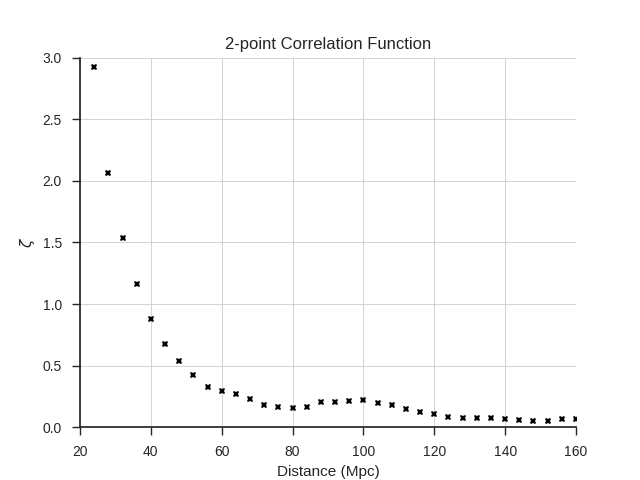

In [12]:
#print(rsep)
ndata = len(dt[0])
nrand = len(rt[0])

#print(ndata,nrand)

dd_norm = (ndata*ndata - ndata)/2.0
rr_norm = (nrand*nrand - nrand)/2.0
dr_norm = float(nrand*ndata)

#print(dd_norm,dr_norm,rr_norm)

zeta = (fhist_dd[0]/dd_norm - (2.*fhist_dr[0]/dr_norm) + fhist_rr[0]/rr_norm)/(fhist_rr[0]/rr_norm)

#print(zeta[0:10])
#print(rsep[0:10])


#zeta = (hist_dd[0] - 2*hist_dr[0] + hist_rr[0])/(hist_rr[0])

r = fhist_dd[1]

plt.figure()
#plt.plot(r,zeta,'c-')
plt.plot(r,zeta*20,'kX',markersize='5')

plt.xlim(20,160)
plt.ylim(0,3)

plt.xlabel('Distance (Mpc)')
plt.ylabel('$\zeta$')

plt.title('2-point Correlation Function')

plt.grid(linewidth='0.6')


sn.despine()

plt.savefig('2pt_sdss.png')



In [ ]:
sn.set_style("ticks",sn.axes_style({'axes.grid': True,
                                    'grid.linestyle':'--',
                                    'axes.linewidth':'1'}))

In [ ]:
fzeta = (fhist_dd/dd_norm - (2.*fhist_dr/dr_norm) + fhist_rr/rr_norm)/(fhist_rr/rr_norm)

In [ ]:
plt.figure()
plt.plot(r,fzeta,'kX',markersize='5')

In [ ]:
(1188/dd_norm - 2*2016./dr_norm + 1162/rr_norm)/(1162/rr_norm)

In [ ]:
#rrt = 857576948.000000
#ddt = 215738468.000000
#drt = 215738468.000000

ddt = 37143347
drt = 172778730
rrt = 201675004

ndt = 500000
nrt = 1000000

ddnt = (ndt*ndt - ndt)/2.0
rrnt = (nrt*nrt - nrt)/2.0
drnt = float(ndt*nrt)

print(ddnt,rrnt,drnt)

(ddt/ddnt - 2.0*drt/drnt + rrt/rrnt)/(rrt/rrnt)